In [37]:
total_counts.to_csv("data/time_in_location_team.csv")

In [1]:
import json
%matplotlib inline
from utils import (create_pair_grid, label_teams, create_counts_mat_team, 
                   markdown_table, label_zones, create_counts_mat)

In [2]:
import pandas as pd
total_counts = pd.read_csv('data/time_in_location_team.csv', header=None)
total_counts = total_counts.set_index([0,1,2])

In [3]:
count_mat = create_counts_mat(total_counts.xs('of', level=2))
count_mat_zones = label_zones(count_mat)
count_mat_zones_teams = label_teams(count_mat_zones)

In [4]:
md_tab = markdown_table(count_mat_zones_teams.head().T.reset_index().rename(columns={'index': 'Court location'}))
print(md_tab)

Court location|Atlanta Hawks|Boston Celtics|Cleveland Cavaliers|New Orleans Pelicans|Chicago Bulls
---|---|---|---|---|---
Right Side(R), 8-16 ft.|123166.0|107415.0|94023.0|110121.0|99741.0
Right Side(R), 16-24 ft.|39441.0|36185.0|33619.0|37517.0|33116.0
Right Side(R), 24+ ft.|30790.0|33755.0|32463.0|34825.0|28755.0
Left Side(L), 8-16 ft.|119688.0|109750.0|92093.0|110741.0|106847.0
Left Side(L), 16-24 ft.|38775.0|39321.0|33153.0|37668.0|36788.0
Left Side(L), 24+ ft.|30794.0|32525.0|27419.0|30732.0|28469.0
Center(C), Less Than 8 ft.|178075.0|165085.0|132478.0|152651.0|152355.0
Center(C), 8-16 ft.|111683.0|106864.0|81378.0|98642.0|93911.0
Center(C), 16-24 ft.|96989.0|94775.0|77557.0|96165.0|84058.0
Center(C), 24+ ft.|238814.0|245019.0|190058.0|229289.0|205926.0
Right Side Center(RC), 16-24 ft.|73459.0|73915.0|64262.0|76087.0|65101.0
Right Side Center(RC), 24+ ft.|126667.0|130071.0|112729.0|128496.0|110340.0
Left Side Center(LC), 16-24 ft.|72518.0|78640.0|59348.0|75426.0|62812.0
Left Side

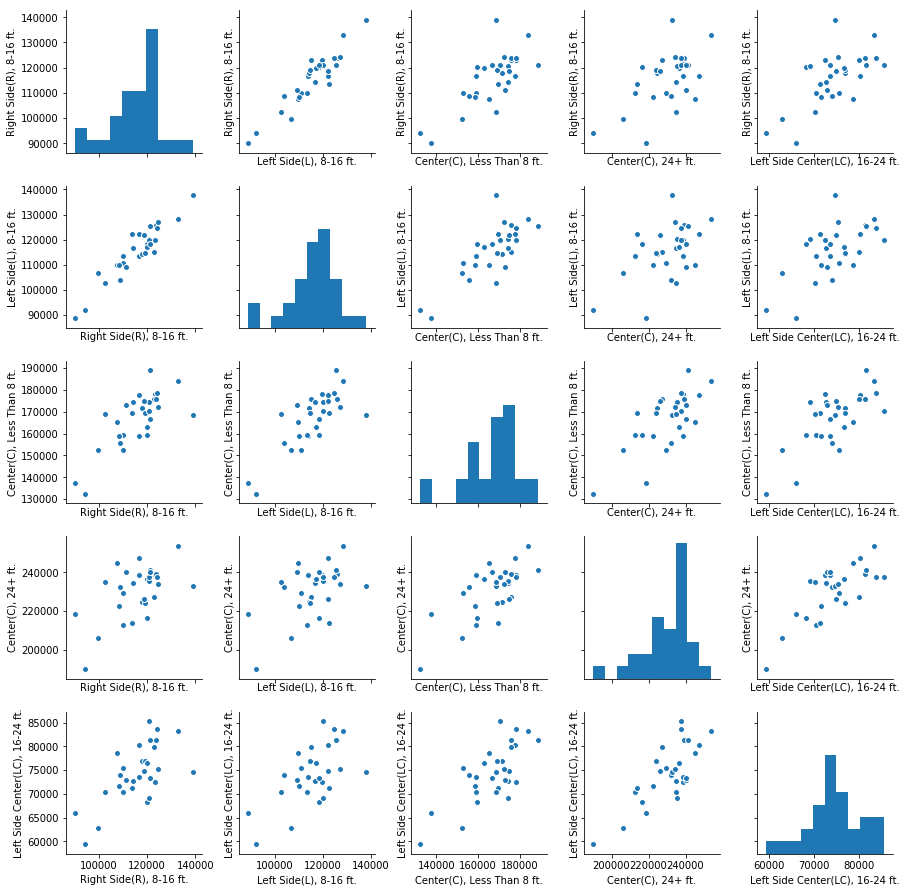

In [6]:
%matplotlib inline
mat_subset = count_mat_zones_teams.iloc[:,[i for i in range(0, 15, 3)]]
create_pair_grid(mat_subset)

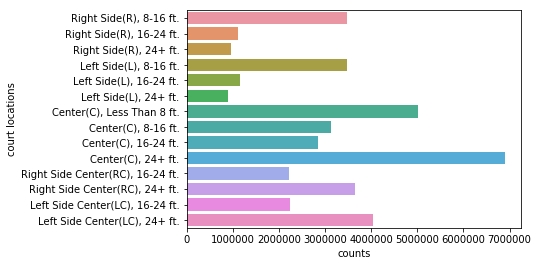

In [21]:
import seaborn as sns
ax = sns.barplot(x='counts', y='court locations', 
                 data =pd.DataFrame({'counts': mat.sum(), 'court locations': mat.columns}))
plt.savefig('report/distribution_across_locations_team_offense.png')

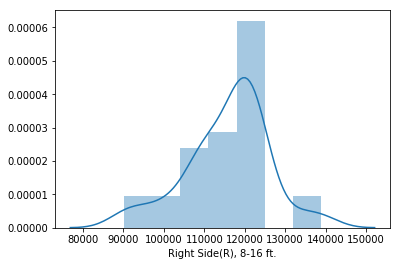

In [70]:
sns.distplot(mat['Right Side(R), 8-16 ft.'])

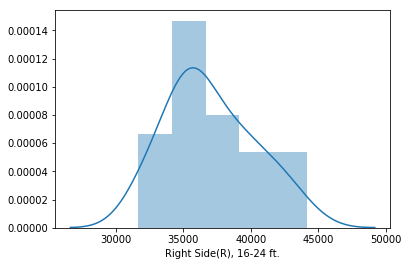

In [71]:
sns.distplot(mat['Right Side(R), 16-24 ft.'])

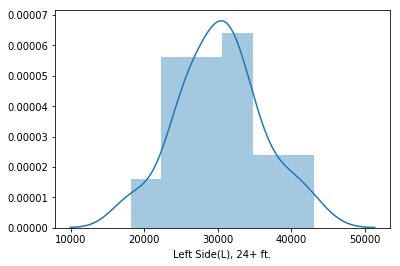

In [72]:
sns.distplot(mat['Left Side(L), 24+ ft.'])

In [73]:
mat['Right Side Center(RC), 16-24 ft.']

Atlanta Hawks             73459.0
Boston Celtics            73915.0
Cleveland Cavaliers       64262.0
New Orleans Pelicans      76087.0
Chicago Bulls             65101.0
Dallas Mavericks          77267.0
Denver Nuggets            81155.0
Golden State Warriors     77857.0
Houston Rockets           71429.0
Los Angeles Clippers      72872.0
Los Angeles Lakers        80410.0
Miami Heat                75908.0
Milwaukee Bucks           76283.0
Minnesota Timberwolves    82859.0
Brooklyn Nets             72848.0
New York Knicks           74904.0
Orlando Magic             65257.0
Indiana Pacers            76741.0
Philadelphia 76ers        67508.0
Phoenix Suns              72319.0
Portland Trail Blazers    78914.0
Sacramento Kings          71298.0
San Antonio Spurs         69489.0
Oklahoma City Thunder     77123.0
Toronto Raptors           80789.0
Utah Jazz                 74503.0
Memphis Grizzlies         79836.0
Washington Wizards        68227.0
Detroit Pistons           68885.0
Charlotte Horn

In [74]:
from sklearn.decomposition import PCA, FactorAnalysis

X = mat
np.cov(mat)
pca = PCA()
X_r = pca.fit(X).transform(X)

X_cov = np.cov(mat.T)
pca_cov = PCA()
X_cov_r = pca_cov.fit(X_cov).transform(X_cov)

X_corr = np.corrcoef(mat.T)
pca_cor = PCA()
X_cov_r = pca_cor.fit(X_corr).transform(X_corr)

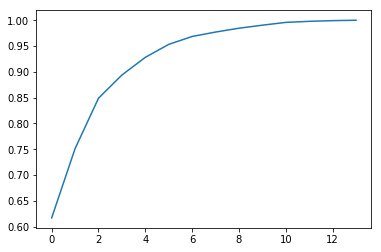

In [75]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

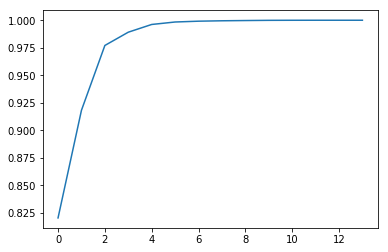

In [76]:
plt.plot(np.cumsum(pca_cov.explained_variance_ratio_))

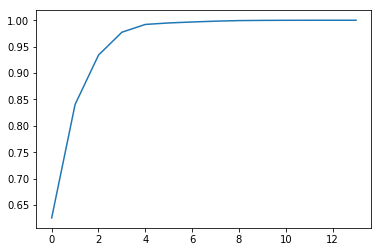

In [77]:
plt.plot(np.cumsum(pca_cor.explained_variance_ratio_))

In [78]:
import numpy as np
fa = FactorAnalysis(n_components=8)
X_fa_r = fa.fit(X).transform(X)

fa_cov = FactorAnalysis(n_components=4)
X_fa_r = fa_cov.fit(X_cov).transform(X_cov)

fa_corr = FactorAnalysis(n_components=4)
X_fa_r = fa_corr.fit(X_corr).transform(X_corr)

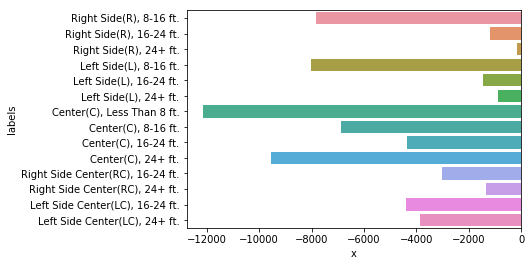

In [79]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
import seaborn as sns
ax = sns.barplot(x='x', y='labels', data =pd.DataFrame({'x': fa.components_[0], 'labels': X.columns}))

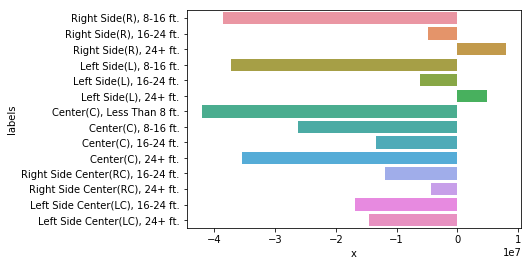

In [80]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
import seaborn as sns
ax = sns.barplot(x='x', y='labels', data =pd.DataFrame({'x': fa_cov.components_[0], 'labels': X.columns}))

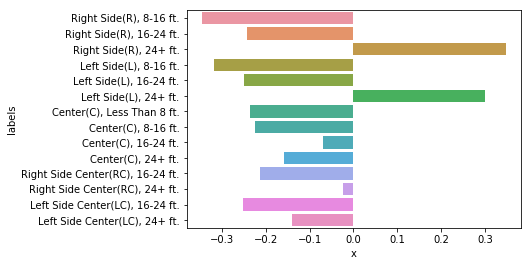

In [81]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
import seaborn as sns
ax = sns.barplot(x='x', y='labels', data =pd.DataFrame({'x': fa_corr.components_[0], 'labels': X.columns}))

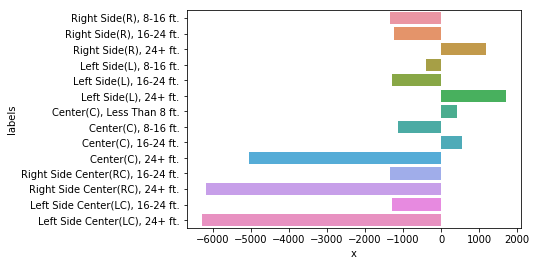

In [82]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
import seaborn as sns

ax = sns.barplot(x='x', y='labels', data =pd.DataFrame({'x': fa.components_[1], 'labels': X.columns}))

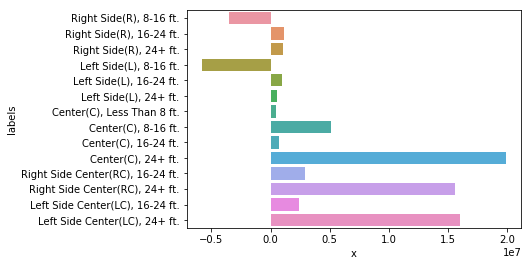

In [83]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
import seaborn as sns
ax = sns.barplot(x='x', y='labels', data =pd.DataFrame({'x': fa_cov.components_[1], 'labels': X.columns}))

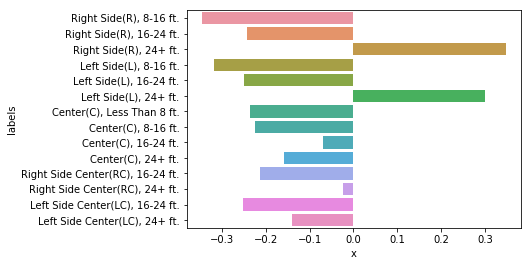

In [86]:
ax = sns.barplot(x='x', y='labels', data =pd.DataFrame({'x': fa_corr.components_[0], 'labels': X.columns}))

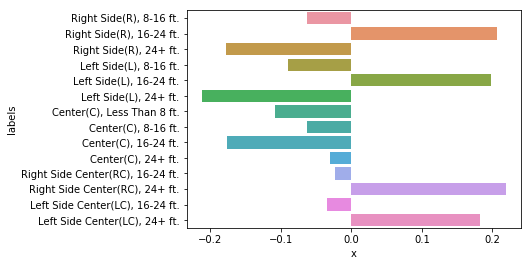

In [84]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
import seaborn as sns
ax = sns.barplot(x='x', y='labels', data =pd.DataFrame({'x': fa_corr.components_[1], 'labels': X.columns}))

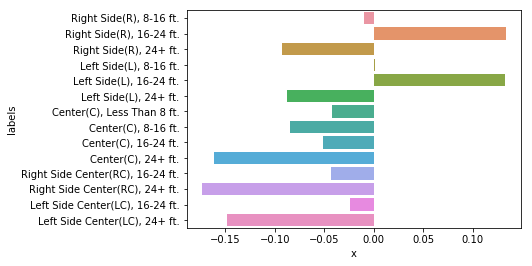

In [85]:
ax = sns.barplot(x='x', y='labels', data =pd.DataFrame({'x': fa_corr.components_[2], 'labels': X.columns}))